In [1]:
import pandas as pd  # Importing pandas library for data manipulation
import numpy as np   # Importing numpy library for numerical operations
import matplotlib.pyplot as plt  # Importing matplotlib library for data visualization
import seaborn as sns  # Importing seaborn library for statistical data visualization
import nltk  # Importing Natural Language Toolkit library for text processing
nltk.download('punkt')  # Downloading necessary resources for tokenization
from nltk.tokenize import word_tokenize  # Importing word_tokenize function for tokenizing text
from keras.preprocessing.text import Tokenizer  # Importing Tokenizer from Keras for text tokenization
from keras.preprocessing.sequence import pad_sequences  # Importing pad_sequences for padding sequences
from keras.models import Sequential  # Importing Sequential model from Keras for building neural networks
from keras.layers import Embedding, LSTM, Dense, Dropout  # Importing necessary layers from Keras for building the RNN model
from sklearn.preprocessing import LabelEncoder  # Importing LabelEncoder from scikit-learn for label encoding
import warnings  # Importing warnings module to handle warnings
warnings.filterwarnings('ignore')  # Setting up to ignore warnings
sns.set()  # Setting the seaborn style for data visualization

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [2]:
imdb=pd.read_csv("/content/sample_data/IMDB Dataset.csv")
imdb.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [3]:
# Count the number of occurrences of each unique value in the "sentiment" column
imdb.sentiment.value_counts()

positive    25000
negative    25000
Name: sentiment, dtype: int64

In [5]:
text = imdb['review'][0]  # Selecting the first review from the 'review' column and assigning it to the variable 'text'
print(text)  # Printing the content of the 'text' variable, which contains the first review from the IMDb dataset
print("<===============>")  # Printing a separator to visually distinguish between the review text and the tokenized version of the text
print(word_tokenize(text))  # Tokenizing the review text using the 'word_tokenize()' function from the NLTK library. This function splits the text into individual words and punctuation marks, creating a list of tokens


One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to the fac

In [6]:
corpus = []  # Initialize an empty list to store tokenized texts

# Iterate over each review text in the 'review' column of the IMDb dataset
for text in imdb['review']:
    # Tokenize each review text into individual words, convert to lowercase, and store in the 'words' list
    words = [word.lower() for word in word_tokenize(text)]
    # Append the tokenized text (list of words) to the 'corpus' list
    corpus.append(words)


In [7]:
num_words = len(corpus)  # Calculate the total number of words in the corpus
print(num_words)  # Print the total number of words in the corpus

50000


In [8]:
# Check the shape of the IMDb DataFrame
imdb.shape

(50000, 2)

In [11]:
# Calculate the size of the training set using 80% of the total number of rows in the IMDb DataFrame
train_size = int(imdb.shape[0] * 0.8)

# Split the review text into training set (X_train) and testing set (X_test) based on the calculated train_size
X_train = imdb.review[:train_size]
X_test = imdb.review[train_size:]

# Split the sentiment labels into training set (y_train) and testing set (y_test) based on the calculated train_size
y_train = imdb.sentiment[:train_size]
y_test = imdb.sentiment[train_size:]


In [12]:
tokenizer = Tokenizer(num_words)  # Initialize a Tokenizer with a specified maximum number of words
tokenizer.fit_on_texts(X_train)  # Fit the Tokenizer on the training set review text to generate word indices
X_train = tokenizer.texts_to_sequences(X_train)  # Convert the text data in the training set to sequences of word indices
X_train = pad_sequences(X_train, maxlen=128, truncating='post', padding='post')  # Pad the sequences to ensure uniform length (maxlen=128), truncating and padding as needed


In [13]:
X_train[0], len(X_train[0])

(array([   27,     4,     1,    80,  2102,    45,  1073,    12,   100,
          147,    39,   316,  2968,   409,   459,    26,  3173,    33,
           23,   200,    14,    11,     6,   614,    48,   606,    16,
           68,     7,     7,     1,    87,   148,    12,  3256,    68,
           41,  2968,    13,    92,  5626,     2, 16202,   134,     4,
          569,    60,   271,     8,   200,    36,     1,   673,   139,
         1712,    68,    11,     6,    21,     3,   118,    15,     1,
         7870,  2257,    38, 11540,    11,   118,  2495,    54,  5662,
           16,  5182,     5,  1438,   377,    38,   569,    92,     6,
         3730,     8,     1,   360,   353,     4,     1,   673,     7,
            7,     9,     6,   431,  2968,    14,    12,     6,     1,
        11736,   356,     5,     1, 14689,  6526,  2594,  1087,     9,
         2661,  1432,    20, 22583,   534,    32,  4795,  2451,     4,
            1,  1193,   117,    29,     1,  6893,    25,  2874, 12191,
      

In [14]:
X_test = tokenizer.texts_to_sequences(X_test)  # Convert the text data in the testing set to sequences of word indices
X_text = pad_sequences(X_test, maxlen=128, truncating='post', padding='post')  # Pad the sequences to ensure uniform length (maxlen=128), truncating and padding as needed

In [15]:
X_test[0], len(X_test[0])

([87,
  122,
  10,
  180,
  5,
  132,
  12,
  10,
  7131,
  3717,
  20,
  1,
  1001,
  2285,
  2,
  10,
  255,
  1,
  17,
  2431,
  10,
  1311,
  5,
  103,
  1,
  222,
  6349,
  4,
  3,
  19,
  11,
  17,
  974,
  3,
  351,
  5,
  215,
  1011,
  415,
  9,
  13,
  215,
  1380,
  56,
  235,
  402,
  300,
  4,
  316,
  23,
  257,
  19,
  961,
  12,
  22250,
  12,
  33,
  66,
  61,
  212,
  53,
  16,
  11,
  113,
  13,
  497,
  2,
  1,
  102,
  70,
  5358,
  15,
  1,
  88,
  172,
  1,
  473,
  824,
  8,
  1,
  64,
  67,
  54,
  49,
  2406,
  30,
  29,
  33,
  90,
  40,
  35787,
  83,
  46,
  438,
  4,
  3,
  74,
  220,
  2,
  10,
  115,
  21,
  63,
  12,
  30,
  29,
  268,
  10,
  1059,
  137,
  10,
  78,
  21,
  119,
  28,
  13,
  1,
  88,
  175,
  5,
  728,
  3423,
  108,
  8,
  1,
  17,
  10,
  115,
  21,
  5810,
  42,
  99,
  289,
  15,
  11,
  1178,
  10,
  213,
  650,
  19107,
  58,
  212,
  5,
  1,
  2242,
  4,
  11,
  369,
  2431,
  17,
  2,
  805,
  3,
  7810,
  2139,
  1640,
  29,

In [17]:
print(X_train.shape, y_train.shape)  # Print the shapes of the training data (X_train) and its corresponding labels (y_train)
print(len(X_test), len(y_test))      # Print the lengths of the testing data (X_test) and its corresponding labels (y_test)


(40000, 128) (40000,)
10000 10000


In [18]:
le = LabelEncoder()  # Initialize a LabelEncoder object
y_train = le.fit_transform(y_train)  # Fit and transform the training set labels to numerical format
y_test = le.transform(y_test)        # Transform the testing set labels to numerical format using the same encoder

In [19]:
model = Sequential()  # Initialize a Sequential model

# Add an Embedding layer to the model with the specified parameters:
# input_dim=num_words: Number of unique words in the vocabulary
# output_dim=100: Dimensionality of the dense embedding
# input_length=128: Length of input sequences
# trainable=True: Allow the embedding weights to be updated during training
model.add(Embedding(input_dim=num_words, output_dim=100, input_length=128, trainable=True))

# Add an LSTM layer to the model with 100 units, dropout rate of 0.1, and return_sequences=True to return sequences
model.add(LSTM(100, dropout=0.1, return_sequences=True))

# Add another LSTM layer to the model with 100 units and dropout rate of 0.1
model.add(LSTM(100, dropout=0.1))

# Add a Dense layer with 1 unit and sigmoid activation function for binary classification
model.add(Dense(1, activation='sigmoid'))

# Compile the model with binary_crossentropy loss function, adam optimizer, and accuracy metric
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 128, 100)          5000000   
                                                                 
 lstm (LSTM)                 (None, 128, 100)          80400     
                                                                 
 lstm_1 (LSTM)               (None, 100)               80400     
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 5160901 (19.69 MB)
Trainable params: 5160901 (19.69 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [25]:
import numpy as np

# Convert X_train from list of lists to a numpy array
X_train = np.array(X_train)

# Convert y_train from list to a numpy array
y_train = np.array(y_train)

# Pad sequences in X_test to the same length as the longest sequence in the dataset
X_test = pad_sequences(X_test, maxlen=128, truncating='post', padding='post')

# Convert X_test from list of padded sequences to a numpy array
X_test = np.array(X_test)

# Train the model using the converted training data
history = model.fit(X_train, y_train, epochs=5, batch_size=64, validation_data=(X_test, y_test))


Epoch 1/5
625/625 [==============================] - 335s 536ms/step - loss: 0.1090 - accuracy: 0.9639 - val_loss: 0.5144 - val_accuracy: 0.8466
Epoch 2/5
625/625 [==============================] - 352s 563ms/step - loss: 0.0902 - accuracy: 0.9714 - val_loss: 0.5451 - val_accuracy: 0.8500
Epoch 3/5
625/625 [==============================] - 335s 536ms/step - loss: 0.0634 - accuracy: 0.9805 - val_loss: 0.6008 - val_accuracy: 0.8356
Epoch 4/5
625/625 [==============================] - 353s 565ms/step - loss: 0.0457 - accuracy: 0.9853 - val_loss: 0.6125 - val_accuracy: 0.8439
Epoch 5/5
625/625 [==============================] - 353s 564ms/step - loss: 0.0356 - accuracy: 0.9898 - val_loss: 0.7172 - val_accuracy: 0.8456


<function matplotlib.pyplot.show(close=None, block=None)>

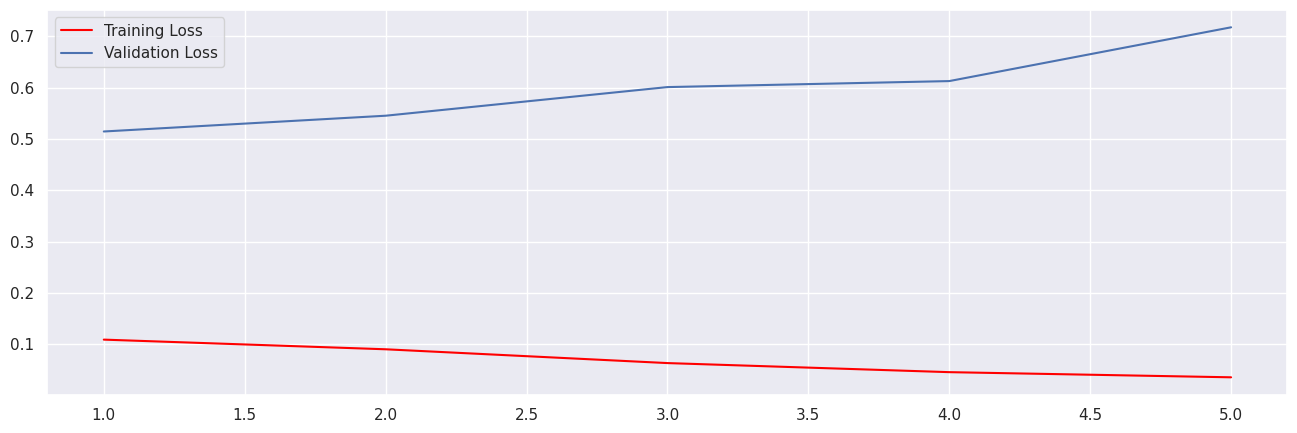

In [26]:
plt.figure(figsize=(16, 5))  # Create a new figure with specified size for plotting

# Generate the range of epochs for x-axis
epochs = range(1, len(history.history['accuracy']) + 1)

# Plot the training loss over epochs with a red line and label
plt.plot(epochs, history.history['loss'], 'b', label='Training Loss', color='red')

# Plot the validation loss over epochs with a blue line and label
plt.plot(epochs, history.history['val_loss'], 'b', label='Validation Loss')

# Add legend to the plot
plt.legend()

# Show the plot
plt.show


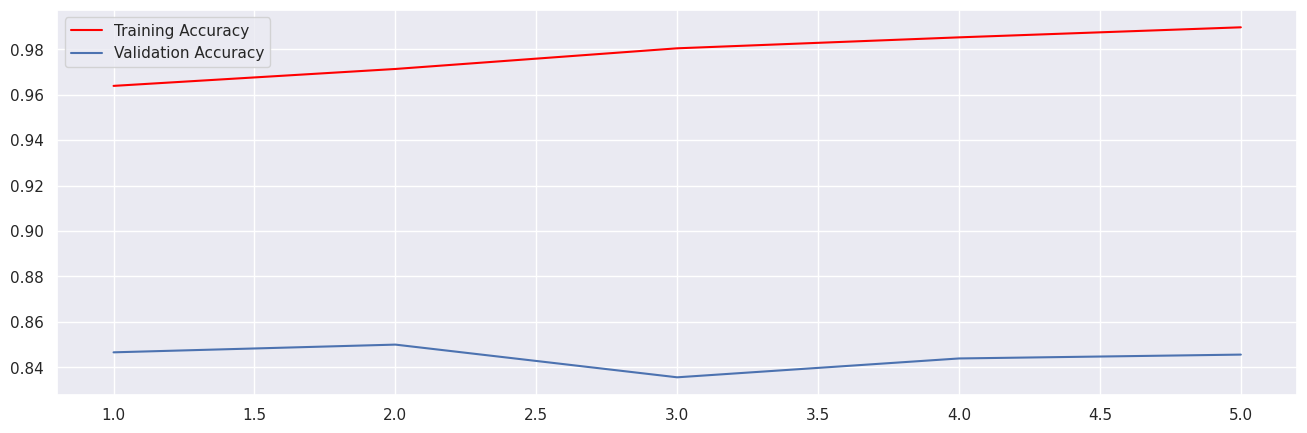

In [27]:
plt.figure(figsize=(16, 5))  # Create a new figure with specified size for plotting

# Generate the range of epochs for x-axis
epochs = range(1, len(history.history['accuracy']) + 1)

# Plot the training accuracy over epochs with a red line and label
plt.plot(epochs, history.history['accuracy'], 'b', label='Training Accuracy', color='red')

# Plot the validation accuracy over epochs with a blue line and label
plt.plot(epochs, history.history['val_accuracy'], 'b', label='Validation Accuracy')

# Add legend to the plot
plt.legend()

# Show the plot
plt.show()


In [28]:
validation_sentence=['If you like original gut wrenching laughter you will like this movie. If you are young or old then you will love this movie, hell even my mom liked it.<br /><br />Great Camp!!!']

# Tokenize the validation sentence using the tokenizer fitted on the training data
validation_sentence_tokened = tokenizer.texts_to_sequences(validation_sentence)

# Pad the tokenized validation sentence to ensure uniform length (maxlen=128), truncating and padding as needed
validation_sentence_padded = pad_sequences(validation_sentence_tokened, maxlen=128, truncating='post', padding="post")

# Print the original validation sentence
print(validation_sentence[0])

# Print the probability of the validation sentence being positive using the trained model
# Use model.predict() to obtain the predicted probability of positive sentiment for the padded validation sentence
# Access the first element of the predicted probabilities array since we have only one sentence
print("Probability of Positive: {}".format(model.predict(validation_sentence_padded)[0]))


If you like original gut wrenching laughter you will like this movie. If you are young or old then you will love this movie, hell even my mom liked it.<br /><br />Great Camp!!!
1/1 [==============================] - 3s 3s/step
Probability of Positive: [0.99933034]


In [29]:
validation_sentence=['Some films just simply should not be remade. This is one of them. In and of itself it is not a bad film. But it fails to capture the flavor and the terror of the 1963 film of the ']

# Tokenize the validation sentence using the tokenizer fitted on the training data
validation_sentence_tokened = tokenizer.texts_to_sequences(validation_sentence)

# Pad the tokenized validation sentence to ensure uniform length (maxlen=128), truncating and padding as needed
validation_sentence_padded = pad_sequences(validation_sentence_tokened, maxlen=128, truncating='post', padding="post")

# Print the original validation sentence
print(validation_sentence[0])

# Print the probability of the validation sentence being positive using the trained model
# Use model.predict() to obtain the predicted probability of positive sentiment for the padded validation sentence
# Access the first element of the predicted probabilities array since we have only one sentence
print("Probability of Positive: {}".format(model.predict(validation_sentence_padded)[0]))


Some films just simply should not be remade. This is one of them. In and of itself it is not a bad film. But it fails to capture the flavor and the terror of the 1963 film of the 
1/1 [==============================] - 0s 204ms/step
Probability of Positive: [0.0003743]


In [30]:
validation_sentence=['I had the terrible misfortune of having to view this b-movie in it All I have to say is--- save your time and money!!! This has got to be the worst b-']

# Tokenize the validation sentence using the tokenizer fitted on the training data
validation_sentence_tokened = tokenizer.texts_to_sequences(validation_sentence)

# Pad the tokenized validation sentence to ensure uniform length (maxlen=128), truncating and padding as needed
validation_sentence_padded = pad_sequences(validation_sentence_tokened, maxlen=128, truncating='post', padding="post")

# Print the original validation sentence
print(validation_sentence[0])

# Print the probability of the validation sentence being positive using the trained model
# Use model.predict() to obtain the predicted probability of positive sentiment for the padded validation sentence
# Access the first element of the predicted probabilities array since we have only one sentence
print("Probability of Positive: {}".format(model.predict(validation_sentence_padded)[0]))


I had the terrible misfortune of having to view this b-movie in it All I have to say is--- save your time and money!!! This has got to be the worst b-
1/1 [==============================] - 0s 113ms/step
Probability of Positive: [0.00037294]


In [32]:
validation_sentence=['"The Cell" is an exotic masterpiece, a dizzying trip into not only the vast mind of a serial killer, but also into one of a very talented director']

# Tokenize the validation sentence using the tokenizer fitted on the training data
validation_sentence_tokened = tokenizer.texts_to_sequences(validation_sentence)

# Pad the tokenized validation sentence to ensure uniform length (maxlen=128), truncating and padding as needed
validation_sentence_padded = pad_sequences(validation_sentence_tokened, maxlen=128, truncating='post', padding="post")

# Print the original validation sentence
print(validation_sentence[0])

# Print the probability of the validation sentence being positive using the trained model
# Use model.predict() to obtain the predicted probability of positive sentiment for the padded validation sentence
# Access the first element of the predicted probabilities array since we have only one sentence
print("Probability of Positive: {}".format(model.predict(validation_sentence_padded)[0]))


"The Cell" is an exotic masterpiece, a dizzying trip into not only the vast mind of a serial killer, but also into one of a very talented director
1/1 [==============================] - 0s 60ms/step
Probability of Positive: [0.9929594]


In [33]:
validation_sentence=['just cant compete with Rodney Dangerfield. Ty Webb is funny, being the only character from the original. Most of the other characters in the movie lack the punch of the ']

# Tokenize the validation sentence using the tokenizer fitted on the training data
validation_sentence_tokened = tokenizer.texts_to_sequences(validation_sentence)

# Pad the tokenized validation sentence to ensure uniform length (maxlen=128), truncating and padding as needed
validation_sentence_padded = pad_sequences(validation_sentence_tokened, maxlen=128, truncating='post', padding="post")

# Print the original validation sentence
print(validation_sentence[0])

# Print the probability of the validation sentence being positive using the trained model
# Use model.predict() to obtain the predicted probability of positive sentiment for the padded validation sentence
# Access the first element of the predicted probabilities array since we have only one sentence
print("Probability of Positive: {}".format(model.predict(validation_sentence_padded)[0]))


just cant compete with Rodney Dangerfield. Ty Webb is funny, being the only character from the original. Most of the other characters in the movie lack the punch of the 
1/1 [==============================] - 0s 103ms/step
Probability of Positive: [0.00037484]


In [34]:
validation_sentence=['I bought this game on an impulse buy from walmart. I am glad I did. It was very entertaining listening to Sean Connery and playing the game. I thought the graphics were the ']

# Tokenize the validation sentence using the tokenizer fitted on the training data
validation_sentence_tokened = tokenizer.texts_to_sequences(validation_sentence)

# Pad the tokenized validation sentence to ensure uniform length (maxlen=128), truncating and padding as needed
validation_sentence_padded = pad_sequences(validation_sentence_tokened, maxlen=128, truncating='post', padding="post")

# Print the original validation sentence
print(validation_sentence[0])

# Print the probability of the validation sentence being positive using the trained model
# Use model.predict() to obtain the predicted probability of positive sentiment for the padded validation sentence
# Access the first element of the predicted probabilities array since we have only one sentence
print("Probability of Positive: {}".format(model.predict(validation_sentence_padded)[0]))


I bought this game on an impulse buy from walmart. I am glad I did. It was very entertaining listening to Sean Connery and playing the game. I thought the graphics were the 
1/1 [==============================] - 0s 109ms/step
Probability of Positive: [0.99928784]
